In [1]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-07-06 13:31:38--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K  80.5KB/s    in 0.4s    

2020-07-06 13:31:40 (80.5 KB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker 
import itertools
from sklearn import preprocessing

In [4]:
data=pd.read_csv("teleCust1000t.csv")
data

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [9]:
data['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb569d95910>]],
      dtype=object)

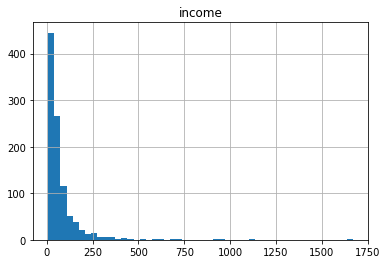

In [17]:
data.hist(column="income",bins=50)

In [18]:
data.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [5]:
X=data[["region","tenure","age","marital","address","income","ed","employ","retire","gender","reside"]].values
(X[0:5])


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [6]:
y=data["custcat"].values
y[0:5]

array([1, 4, 3, 1, 3])

In [31]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))


In [7]:
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
print(X_train.shape)

(800, 11)


In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
k=4
neigh=KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [57]:
yhat=neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

In [14]:
from sklearn import metrics
print(metrics.accuracy_score(y_train,neigh.predict(X_train)))

0.55625


In [15]:
ks=25
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
mx=[]
for n in range(1,ks):
    model=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=model.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc
#std_acc

array([0.275, 0.31 , 0.275, 0.26 , 0.3  , 0.295, 0.35 , 0.33 , 0.32 ,
       0.32 , 0.345, 0.33 , 0.32 , 0.34 , 0.355, 0.32 , 0.335, 0.34 ,
       0.355, 0.345, 0.325, 0.345, 0.345, 0.34 ])

Text(0, 0.5, 'Accuracy')

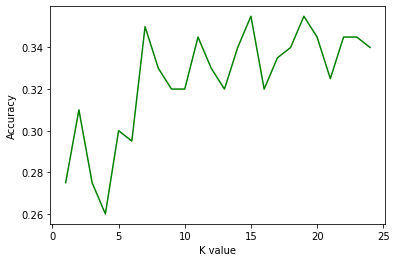

In [16]:
plt.plot(range(1,ks),mean_acc,"g")
plt.xlabel("K value")
plt.ylabel("Accuracy")

In [79]:
print("the best accuracy is",mean_acc.max(),"with k value",mean_acc.argmax()+1)

the best accuracy is 0.37 with k value 23
